### Code to generate the data:
python -m grid --n 4 chare_structure_factor "python charge_structure_factor.py --name interface --sigma 100 --Niter 2000 --kmin -2 --kmax 2 --Nk 200 --scale log" --d 2 3 5 10 --ptr 144 243 696 2000 6810

### Figures for the paper

In [1]:
import os
import sys
sys.path.append("../")
import numpy as np
import utils

import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
rc('text', usetex=True)
rcParams['font.family'] = 'DejaVu Sans'
from matplotlib.patches import Patch 
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition, mark_inset)
import matplotlib.cm as cm

/home/jonas/local/py3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  del sys.path[0]


In [2]:
name = "charge_structure_factor"
d = 5
data = utils.get_Q2(name, d)

<IPython.core.display.Javascript object>


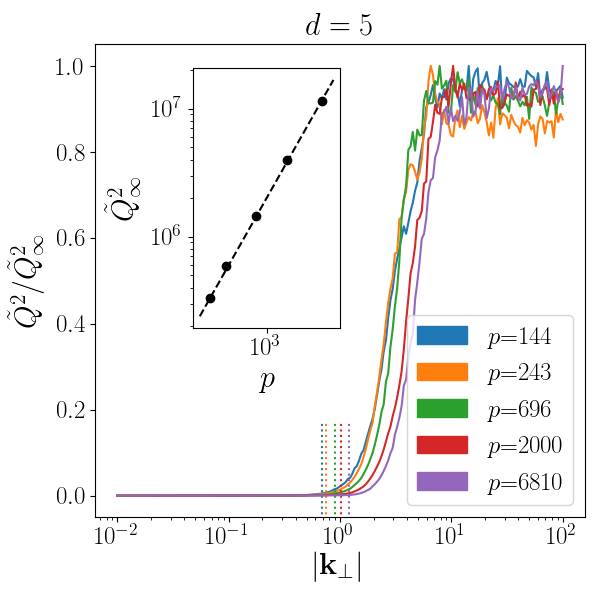

/home/jonas/local/py3/lib/python3.6/site-packages/ipykernel_launcher.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


In [3]:
%matplotlib notebook

ps = [p for p in data["k"].keys()]
labels = [Patch(color="C{}".format(i), label=r"$p$={}".format(p)) for i, p in enumerate(ps)]

fig, ax = plt.subplots(figsize=(6, 6))

rstar = {
    3: {144: 0.37, 243: 0.3, 696: 0.22, 2000: 0.15, 6810: 0.11},
    5: {144: 1.44, 243: 1.34, 696: 1.1, 2000: 0.98, 6810: 0.83},
    10: {144: 2.9, 243: 2.82, 696: 2.6, 2000: 2.43, 6810: 2.3},
    30: {144: 6.63, 243: 6.63, 696: 6.38, 2000: 6.14, 6810: 5.94}
}

for i, p in enumerate(ps):
    ax.plot(data["k"][p], data["Q2"][p] / data["Q2"][p].max(), color="C{}".format(i), Linestyle='-')
    ax.axvline(1 / rstar[d][p], -0.1, 0.2, color="C{}".format(i), Linestyle='dotted')
    
ax.set_xlabel(r"$|\mathbf{k}_{\perp}|$", fontsize=22)
ax.set_ylabel(r"$\tilde{Q}^2 / \tilde{Q}^2_{\infty}$", fontsize=22)
ax.set(xscale='log', yscale='linear')
ax.tick_params(labelsize=18)
ax.legend(handles=labels, loc="lower right", fontsize=18)
ax.set_title(r"$d={}$".format(d), fontsize=22)

# inset plot
ax2 = plt.axes([0,0,1,1])
ip = InsetPosition(ax, [0.2,0.4,0.3,0.55])
ax2.set_axes_locator(ip)

pf = {3: 3000, 5: 3400, 10: 2100, 30: 1300}
A = [data["Q2"][p].max() for p in ps]
x = np.linspace(100, 10000)
y = pf[d] * x**((2 * d + 2) / (3 * d - 2))

ax2.plot(ps, A, color="k", Linestyle='None', marker='o')
ax2.plot(x, y, color="k", Linestyle='--')
ax2.set_xlabel(r"$p$", fontsize=22)
ax2.set_ylabel(r"$\tilde{Q}^2_{\infty}$", fontsize=22)
ax2.set(xscale='log', yscale='log')
ax2.tick_params(labelsize=18)

plt.tight_layout()
#plt.savefig("path_to_figure".format(d), format="pdf")